Here, I look at the PMT map again and try to make a grid with nodes. The code for getting the PMT positions is copied from PMTMap.ipynb

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import csv

In [3]:
# Load the CSV file
data = np.genfromtxt('pmt_positions.csv', delimiter=',', skip_header=1)

In [4]:
vector_lengths = np.linalg.norm(data, axis=1)
print(vector_lengths)

[8406.98104278 8401.79225567 8406.97712466 ... 8390.08113032 8387.98751197
 8389.30197096]


In [5]:
rescaled_data = data / vector_lengths[:, np.newaxis]

In [6]:
vector_lengths_rescaled = np.linalg.norm(rescaled_data, axis = 1)
print(vector_lengths_rescaled)

[1. 1. 1. ... 1. 1. 1.]


In [7]:
def cartesian_to_spherical(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    phi = np.arctan2(y, x)
    theta = np.arccos(z / r)
    return r, phi, theta

def convert_points_to_spherical(points):
    points_set_polars = []
    for point in points:
        x = point[0]
        y = point[1]
        z = point[2]
        r, phi, theta = cartesian_to_spherical(x, y, z)
        points_set_polars.append((r, phi, theta))
    return points_set_polars

In [8]:
points_polars = convert_points_to_spherical(rescaled_data)

In [9]:
points_phi = np.zeros(len(points_polars))
points_theta = np.zeros(len(points_polars))

for i in range(len(points_polars)):
    points_phi[i] = points_polars[i][1]
    points_theta[i] = points_polars[i][2]

In [17]:
#manually add points to grid array and show them on the plot

points_phi_2 = np.array([np.pi/2, np.pi/2, np.pi/2, np.pi/2,np.pi/2, np.pi/2, np.pi/2])
points_theta_2 = np.array([0, 1/2, 1, 3/2, 2, 5/2, 3])

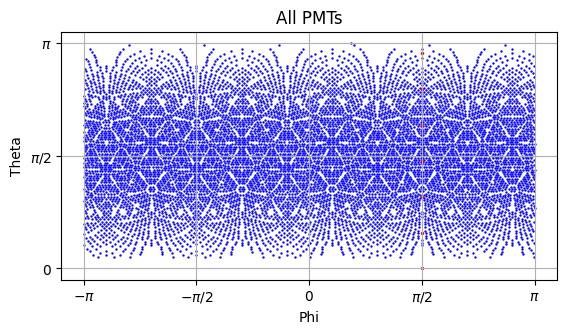

In [18]:
# Plot the grid points
plt.scatter(points_phi, points_theta, s=0.5, color='blue')  # Adjust marker size and color as needed
plt.scatter(points_phi_2, points_theta_2, s=2, color='red')

# Set x-axis ticks
plt.xticks(np.linspace(-np.pi, np.pi, 5), 
           ['$-\pi$', '$-\pi/2$', '$0$', '$\pi/2$', '$\pi$'])

# Set y-axis ticks
plt.yticks(np.linspace(0, np.pi, 3), 
           ['$0$', '$\pi/2$', '$\pi$'])

plt.xlabel('Phi')
plt.ylabel('Theta')
plt.title('All PMTs')

# Set aspect ratio to 'equal'
plt.gca().set_aspect('equal', adjustable='box')

plt.savefig('PMTMapTest.pdf', format='pdf')

plt.grid(True)
plt.show()


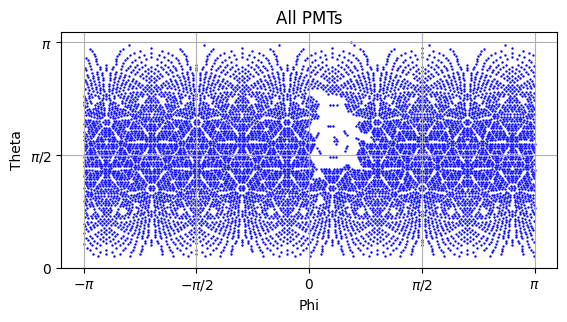

In [20]:
# Plot the grid points
plt.scatter(points_phi[400:], points_theta[400:], s=0.5, color='blue')  # Adjust marker size and color as needed
#plt.scatter(points_phi_2, points_theta_2, s=2, color='red')

# Set x-axis ticks
plt.xticks(np.linspace(-np.pi, np.pi, 5), 
           ['$-\pi$', '$-\pi/2$', '$0$', '$\pi/2$', '$\pi$'])

# Set y-axis ticks
plt.yticks(np.linspace(0, np.pi, 3), 
           ['$0$', '$\pi/2$', '$\pi$'])

plt.xlabel('Phi')
plt.ylabel('Theta')
plt.title('All PMTs')

# Set aspect ratio to 'equal'
plt.gca().set_aspect('equal', adjustable='box')

plt.savefig('PMTMapWithGap.pdf', format='pdf')

plt.grid(True)
plt.show()
